In [141]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  features_X = np.c_[np.ones((features_X.shape[0], 1)), features_X]

  return features_X, sales_Y

In [22]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [25]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [26]:
def create_individual(n=4, bound=10):
  individual = []

  for _ in range(n):
      gene = random.uniform(-bound / 2, bound / 2)
      individual.append(gene)
  return individual
  


In [28]:
individual = create_individual()
print(individual)

[0.11274721368608542, -0.9506586254958567, 2.837985890347726, -1.9668727392107255]


In [30]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)

    return fitness

In [ ]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [ ]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    if random.random() < crossover_rate:
        crossover_point = random.randint(0, len(individual1) - 1)
        individual1_new = individual1[:crossover_point] + individual2[crossover_point:]
        individual2_new = individual2[:crossover_point] + individual1[crossover_point:]

    return individual1_new, individual2_new

In [176]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [188]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] += random.uniform(-1, 1)


    return individual_m

In [231]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [232]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [233]:
population = initializePopulation(100)
print(len(population))

100


In [234]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [ ]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.7707102346493941, -0.44255615074371035, -1.7485653418675173, -4.711708834619053]


In [244]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # crossover
        offspring1, offspring2 = crossover(parent1, parent2)

        # mutation
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)

        new_population.append(offspring1)

        if len(new_population) < m-elitism:
            new_population.append(offspring2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [236]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [242]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)
    

  return losses_list


In [251]:
losses_list = run_GA()

Best loss: 1275.7378973969326 with chromsome:  [-1.2575115125586986, -0.03169630153155367, -1.268125903344215, 0.7447085171699594]
Best loss: 1275.7378973969326 with chromsome:  [-1.2575115125586986, -0.03169630153155367, -1.268125903344215, 0.7447085171699594]
Best loss: 339.40261874998674 with chromsome:  [2.256571808927232, -0.039360540879849415, 1.0747707363903567, 0.05851040676578023]
Best loss: 339.40261874998674 with chromsome:  [2.256571808927232, -0.039360540879849415, 1.0747707363903567, 0.05851040676578023]
Best loss: 339.40261874998674 with chromsome:  [2.256571808927232, -0.039360540879849415, 1.0747707363903567, 0.05851040676578023]
Best loss: 168.82419164120932 with chromsome:  [3.744553495881317, 0.06154677796079966, -0.5830517019158972, 0.24264190901689542]
Best loss: 168.82419164120932 with chromsome:  [3.744553495881317, 0.06154677796079966, -0.5830517019158972, 0.24264190901689542]
Best loss: 168.82419164120932 with chromsome:  [3.744553495881317, 0.0615467779607996

Best loss: 696.1852969666099 with chromsome:  [3.7217792794394615, 0.1261068681407993, 1.4153684707107326, -1.0967987478868393]
Best loss: 151.09042261965962 with chromsome:  [-4.5080453366384265, 0.1683812117916066, 0.3413632417967989, -0.26438840128162866]
Best loss: 151.09042261965962 with chromsome:  [-4.5080453366384265, 0.1683812117916066, 0.3413632417967989, -0.26438840128162866]
Best loss: 142.4466352521862 with chromsome:  [-3.34719600838194, 0.1548737909294875, -0.22659026762493362, 0.22447314360771498]
Best loss: 52.53862063512923 with chromsome:  [-0.04660520235175358, 0.03043644556091074, 0.121300052470801, 0.03835727675622014]
Best loss: 52.53862063512923 with chromsome:  [-0.04660520235175358, 0.03043644556091074, 0.121300052470801, 0.03835727675622014]
Best loss: 46.02857114235572 with chromsome:  [-5.1458058687315535, 0.1261068681407993, 0.1502346309582645, -0.10572845886613536]
Best loss: 27.384181918067696 with chromsome:  [0.773428090083125, 0.09399609143000998, 0.1

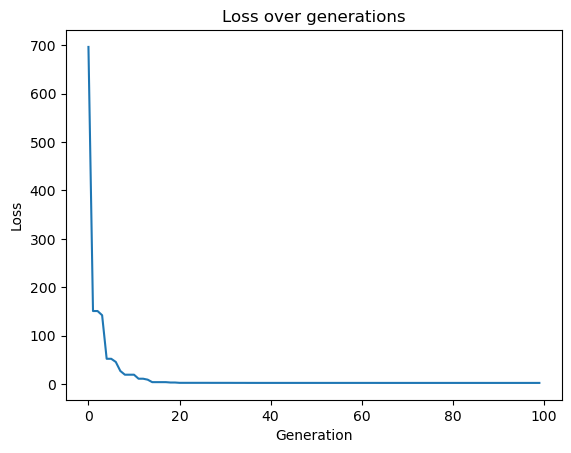

In [250]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
      plt.plot(losses_list)
      plt.xlabel('Generations')
      plt.ylabel('Loss')
      plt.title('Loss over generations')
      plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[-3.574325117813987, -0.37564645472787905, 1.3730352436378146, -0.16712011731899779]


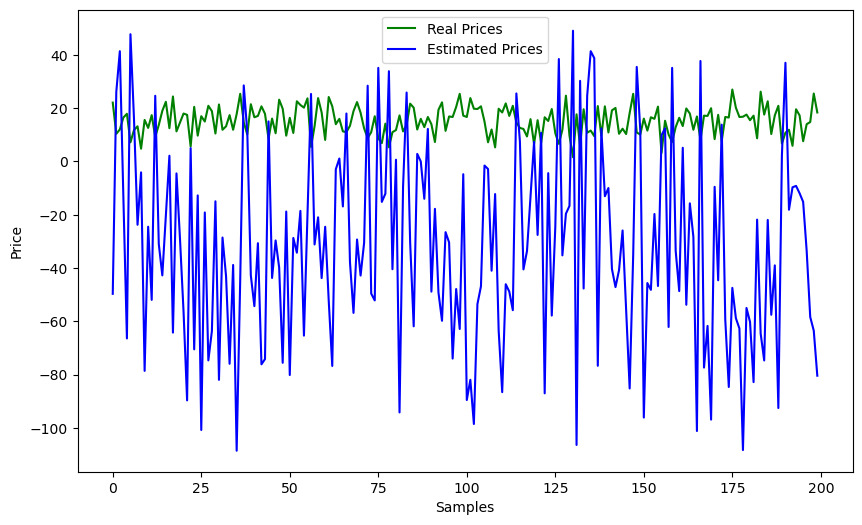

In [256]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)


  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()